In [37]:
import numpy as np
from util import get_hausing_prices_data, plot_points_regression
import matplotlib.pyplot as plt

%matplotlib inline

### Implementação do problema de Regressão Linear

Dado um conjunto de dados $$\mathbb{K}=\{(\vec{x_i}, y_i)\} \qquad i=1,2,...,n$$ Onde $$\text{dim}(\vec{x}) = \text{dim}(\vec{w}) = d$$ 

Resolve-se o problema de regressão linear encontrando-se as componentes do peso $\vec{w}$, as quais darão uma reta, e a melhor reta é escolhida ao minimizarmos uma função de erro qualquer, comumente a Root Mean Squared (RMS) devido à facilidade analítica de trabalhar com ela.

Queremos melhorar nossa função "hipótese" $h$ $$h(\vec{x_i}) = \hat{y_i} = \vec{x}_i \cdot\vec{w}$$

Para isso, temos que minimizar a função RMS dada por $$J(\vec{w})=\frac{1}{n} \sum _{i=1} ^n (\hat{y_i} - y_i)^2$$

E a minimização se dá resolvendo $$\vec{\nabla}_\vec{w} J(\vec{w}) = 0$$

A solução da equação acima nos fornece uma solução analítica para encontrar os pesos $\vec{w}$, tal que

$$\vec{w}=(X^TX)^{-1}X^Ty$$

Onde $X \in \mathbb{R}^{n\ \times \ d}$ é uma matriz cujas linhas tratam-se dos vetores $\vec{x_i} \in \mathbb{R}^{d}$

#### CARREGANDO O DATASET

In [38]:
X, y = get_hausing_prices_data(N=100)


X shape = (100, 1)

y shape = (100, 1)

X:
mean 645.0, sdt 323.65, min 1200.0, max 90.0

y:
mean 43965.37890625, sdt 16477.94, min 80147.296875, max 10315.74609375


#### PLOT DOS DADOS

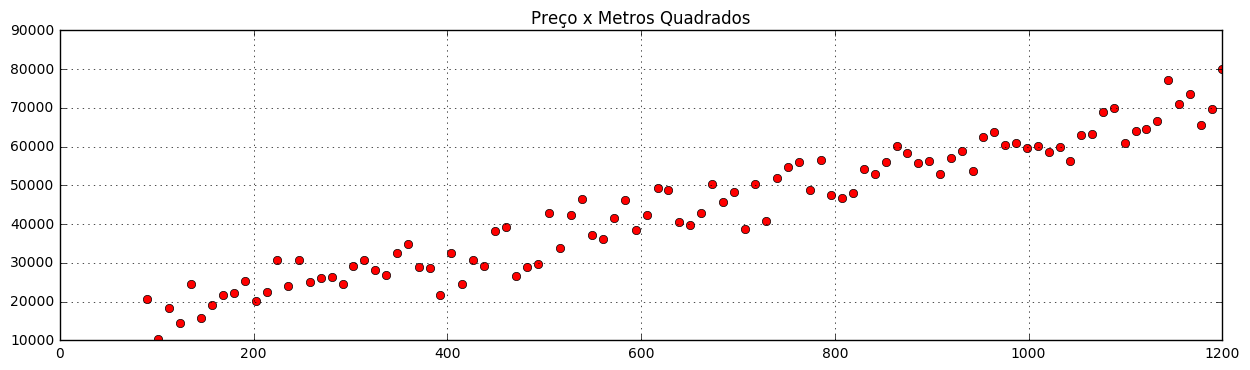

In [39]:
plt.figure(figsize=(15,4))
plt.grid()
plt.title('Preço x Metros Quadrados')
plt.plot(X,y,'ro')
plt.show()

#### FUNÇÕES PARA CALCULAR OS PESOS

In [45]:
def normal_equation_prediction(X, y):
    """
    Calculates the prediction using the normal equation method.ddd

    :param X: design matrix
    :type X: np.array
    :param y: regression targets
    :type y: np.array
    :return: prediction
    :rtype: np.array
    """
    a = np.linalg.inv(np.dot(X.T, X))
    b = np.dot(X.T, y)
    weights = np.dot(a,b)
    
    # Adicionando uma dimensão a mais em cada vetor da matriz X
    x_ones = np.ones((100, 1))
    X = np.hstack((x_ones, X))
    
    # Calculando os pesos 
    weights = calc_weights(X, y)
    
    return weights

R²: 0.966382624082


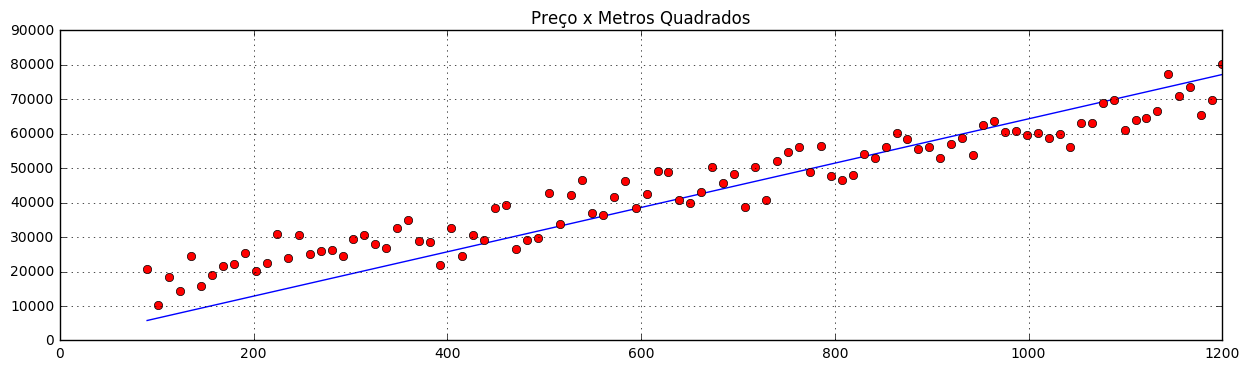

In [46]:
from scipy.stats import linregress

prediction = normal_equation_prediction(X, y)
plt.figure(figsize=(15,4))
plt.grid()
plt.title('Preço x Metros Quadrados')
plt.plot(X, np.dot(X, calc_weights(X, y)))
plt.plot(X, y,'ro')
# Calculando o R^2 utilizando o linregress do SciPy
print('R²:', linregress([vals[0] for vals in X], [vals[0] for vals in y]).rvalue)
plt.show()